In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report 

In [235]:
data = pd.read_csv("data.csv")
data.columns = ["fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides", 
                "free_sulfur_dioxide", "total_sulfur_dioxide", "density", "ph", "sulphates", "alcohol", "quality"]
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


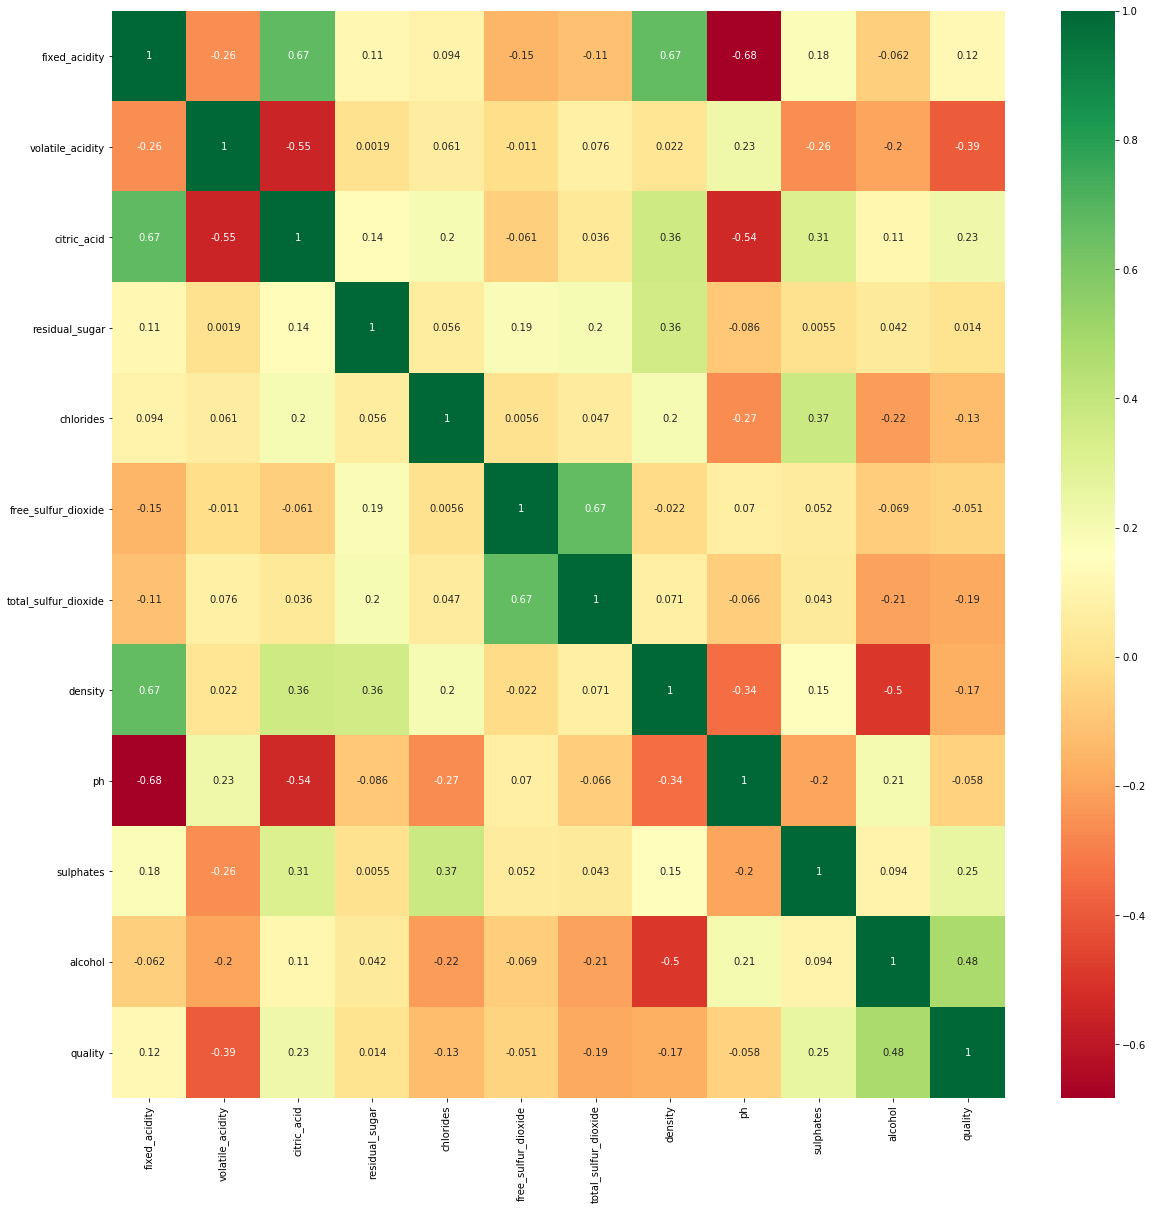

In [236]:
cor = data.corr()
top_corr_features = cor.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

###### cor = data.corr()
top_corr_features = cor.index
plt.figure(figsize=(20,20))
#plot heat map
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [237]:
#Correlation with output variable
cor_target = abs(cor["quality"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

volatile_acidity    0.390558
alcohol             0.476166
quality             1.000000
Name: quality, dtype: float64

In [238]:
X = data.iloc[:,0:11]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 10 best features

                   Specs        Score
6   total_sulfur_dioxide  2755.557984
5    free_sulfur_dioxide   161.936036
10               alcohol    46.429892
1       volatile_acidity    15.580289
2            citric_acid    13.025665


[0.0762101  0.09735356 0.07946775 0.07715724 0.07779825 0.07472337
 0.10202531 0.08496999 0.07580158 0.10286339 0.15162945]


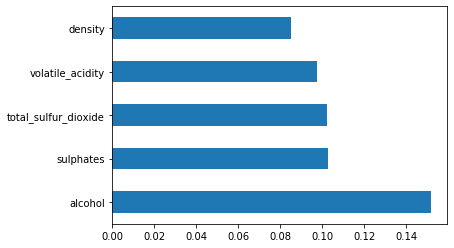

In [239]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [240]:
correlated_data = pd.DataFrame(data, columns = ['total_sulfur_dioxide','free_sulfur_dioxide','sulphates','alcohol',
                                                'volatile_acidity','density'])
target_variable = data['quality']
correlated_data.head()

,total_sulfur_dioxide,free_sulfur_dioxide,sulphates,alcohol,volatile_acidity,density
0,34.0,11.0,0.56,9.4,0.70,0.9978
1,67.0,25.0,0.68,9.8,0.88,0.9968
2,54.0,15.0,0.65,9.8,0.76,0.9970
3,60.0,17.0,0.58,9.8,0.28,0.9980
4,34.0,11.0,0.56,9.4,0.70,0.9978


In [241]:
X_train, X_test, y_train, y_test = train_test_split(correlated_data, target_variable, test_size=0.2)

In [242]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

In [243]:
predictions = lm.predict(X_test)
round(model.score(X_test, y_test)*100,2)
#plt.scatter(y_test, predictions)

37.54

In [244]:
def tarin_using_entropy(X_train, X_test, y_train): 
    # Decision tree with entropy 
    return clf_entropy
# Function to make predictions 
def prediction(X_test, clf_object): 
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    #print(y_pred) 
    return y_pred 
      
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred):
    print ("Accuracy : ", 
    round(accuracy_score(y_test,y_pred)*100))
    #print("Report : ", 
    #classification_report(y_test, y_pred)) 
  

In [245]:
# DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=10, min_samples_leaf=5)
# Performing training 
clf_gini.fit(X_train, y_train) 

# Operational Phase 
print("Results Using Gini Index:") 
      
# Prediction using gini 
y_pred_gini = prediction(X_test, clf_gini) 
cal_accuracy(y_test, y_pred_gini) 
    
clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 10, min_samples_leaf = 5) 
  
 # Performing training 
clf_entropy.fit(X_train, y_train) 
    
print("Results Using Entropy:")
# Prediction using entropy

y_pred_entropy = prediction(X_test, clf_entropy) 
cal_accuracy(y_test, y_pred_entropy) 

Results Using Gini Index:
Predicted values:
Accuracy :  57.0
Results Using Entropy:
Predicted values:
Accuracy :  57.0


In [246]:
#Create a Gaussian Classifier
clf= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
cal_accuracy(y_test, y_pred_entropy) 

Accuracy :  57.0
